<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250, style="padding: 10px"><br> 
<b>Interactive Visualization with Bokeh, HoloViews, and Datashader</b> <br>

<br>Original Author: **Keith Bechtol** ([@bechtol](https://github.com/LSSTScienceCollaborations/StackClub/issues/new?body=@bechtol))
<br>Last Verified: ** 2021-05-21 **
<br>Last Verified by: **Leanne Guy** ([@leannep](https://rubin-dp0/tutorial-notebooks/issues/new?body=@leannep))
<br>Verified Stack Release: **v22.0.0**

<br> Target audience: All DP0 delegates, especially those new to Notebooks. 
<br> Questions welcome at <a href="https://community.lsst.org/c/support/dp0">community.lsst.org/c/support/dp0</a> 
<br> Find DP0 documentation and resources at <a href="https://dp0-1.lsst.io">dp0-1.lsst.io</a> <br>

**Table of Contents**
1. Introduction<br>
 1.1 Interactive Visualization with Bokeh, HoloViews, and Datashader<br>
 1.2 Learning objectives<br>
 1.3 Logistics<br>
2. Setup
3. Data Sample
4. Brushing and linking between scatter plots with Bokeh<br>
5. Image Display<br>

### 1.0 Introduction <br>

#### 1.1 Interactive Visualization with Bokeh, HoloViews, and Datashader<br>


This notebook demonstrates a few of the interactive features of the [Bokeh](https://bokeh.pydata.org/en/latest/), [HoloViews](http://holoviews.org/), and [Datashader](http://datashader.org/) plotting packages in the notebook environment. These packages are part of the [PyViz](http://pyviz.org/) set of python tools intended for visualization use cases in a web browser, and can be used to create quite sophisticated dashboard-like interactive displays and widgets. The goal of this notebook is to provide an introduction and starting point from which to create more advanced, custom interactive visualizations. To get inspired, check out this beautiful [example notebook](https://github.com/lsst-sqre/notebook-demo/blob/master/experiments/QA-notebooks/coadd_9615_HSC-R.ipynb) using HSC data created with the [qa_explorer](https://github.com/timothydmorton/qa_explorer) tools.

#### 1.2 Learning Objectives
After working through and studying this notebook you should be able to
   1. Use `bokeh` to create interactive figures with brushing and linking between multiple plots
   2. Use `holoviews` and `datashader` to create two-dimensional histograms with dynamic binning to efficiently explore large datasets   

#### 1.3 Logistics
This notebook is intended to be runnable on `data.lsst.cloud` from a local git clone of https://github.com/LSSTScienceCollaborations/StackClub.

Note that occasionally the notebook may seem to stall, or the interactive features may seem disabled. If this happens, usually a restart of the kernel fixes the issue. You might also need to log out of the LSP and start a "large" instance of the JupyterLab environment. In some examples shown in this notebook, the order in which the cells are run is important for understanding the interactive features, so you may want to re-run the set of cells in a given section if you encounter unexpected behavior.

In [118]:
# %load_ext pycodestyle_magic
# %flake8_on

# Verbosity level
verbose = False

### 2.0 Setup
You can find the Stack version by using `eups list -s` on the terminal command line.

In [1]:
# What version of the Stack am I using?
! echo $HOSTNAME
! eups list -s | grep lsst_distrib

jupyter-leannep
lsst_distrib          21.0.0-2-g8e5b5ee+272aa73355 	current w_2021_23 setup


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
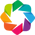

In [2]:
import numpy as np
import astropy.io.fits as pyfits

import bokeh
from bokeh.io import output_file, output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, Range1d, HoverTool, Selection
from bokeh.plotting import figure, output_file

import holoviews as hv
from holoviews import streams
from holoviews.operation.datashader import datashade, dynspread, rasterize
from holoviews.plotting.util import process_cmap
hv.extension('bokeh')

In [3]:
# Need this line to display bokeh plots inline in the notebook
output_notebook()

Loading BokehJS ...

In [220]:
# What version of holoviews are we using
import datashader as dsh
print("Holoviews verion: " + hv.__version__)
print("Datashader version: " + dsh.__version__)

Holoviews verion: 1.14.4
Datashader version: 0.12.1


In [5]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

### 3.0 Data Sample

The data in the following example we will query the catalogs usig the TAP service to obtain a sample of data. The data sample will be updated to select an interesting region once the notebook is fully converted. 

#### 3.1 Create the Rubin TAP Service client

In [1]:
from rubin_jupyter_utils.lab.notebook import get_tap_service, retrieve_query
service = get_tap_service()
assert service is not None

Patching auth into notebook.base.handlers.IPythonHandler(notebook.base.handlers.AuthenticatedHandler) -> IPythonHandler(jupyterhub.singleuser.mixins.HubAuthenticatedHandler, notebook.base.handlers.AuthenticatedHandler)


#### Query the DP0.1 catalogs

In [2]:
# Define our reference position on the sky and cone radius in arcseconds
c1 = SkyCoord(ra=62.0*u.degree, dec=-37.0*u.degree, frame='icrs')
radius = 360 * u.arcsec

NameError: name 'SkyCoord' is not defined

In [ ]:
# Prepsre the query
query = "SELECT obj.objectId, obj.ra, obj.dec, obj.mag_g, obj.mag_r, " \
        " obj.mag_i, obj.mag_g_cModel, obj.mag_r_cModel, obj.mag_i_cModel," \
        "obj.psFlux_g, obj.psFlux_r, obj.psFlux_i, obj.cModelFlux_g, " \
        "obj.cModelFlux_r, obj.cModelFlux_i, obj.tract, obj.patch, " \
        "obj.extendedness, obj.good, obj.clean, " \
        "truth.mag_r as truth_mag_r, truth.match_objectId, "\
        "truth.flux_g, truth.flux_r, truth.flux_i, truth.truth_type, " \
        "truth.match_sep, truth.is_variable " \
        "FROM dp01_dc2_catalogs.object as obj " \
        "JOIN dp01_dc2_catalogs.truth_match as truth " \
        "ON truth.match_objectId = obj.objectId " \
        "WHERE CONTAINS(POINT('ICRS', obj.ra, obj.dec),CIRCLE('ICRS', " \
        + str(c1.ra.value) + ", " + str(c1.dec.value) + ", " \
        + str(radius.to(u.deg).value) + " )) = 1 " \
        "AND truth.match_objectid >= 0 "\
        "AND truth.is_good_match = 1"

### 4.0 Brushing and linking between scatter plots with Bokeh

First, an example with brushing and linking between two panels showing different repsentations of the same dataset. A selection applied to either panel will highlight the selected points in the other panel.

Based on http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/linking.html#linked-brushing 

In [184]:
# Convert the results to a pandas dataframe
data = results.to_table().to_pandas()

# Spatially centre the data around the mean value
ra_target, dec_target = np.mean(data['ra']), np.mean(data['dec'])
# print(ra_target, ", ", dec_target)

# create a column data source for the plots to share
col_data =dict(x0=data['ra'] - ra_target,
               y0=data['dec'] - dec_target,
               x1=data['mag_g'] - data['mag_r'],
               y1=data['mag_g'],
               ra=data['ra'],
               dec=data['dec']
              )
source = ColumnDataSource(data = col_data)
source.data['objectId']=data['objectId']
# print(source.data)

print(np.min(source.data['x0']))

-0.30221304540002336


In [169]:
# Create a custom hover tool on both panels
hover_left = HoverTool(tooltips=[("(RA,DEC)", "(@ra, @dec)"),
                                 ("(g-r,g)", "(@x1, @y1)"),
                                 ("ObjectId", "@objectId")])
hover_right = HoverTool(tooltips=[("(RA,DEC)", "(@ra, @dec)"),
                                  ("(g-r,g)", "(@x1, @y1)"),
                                  ("ObjectId", "@objectId")])
TOOLS = "box_zoom,box_select,lasso_select,reset,help"
TOOLS_LEFT = [hover_left, TOOLS]
TOOLS_RIGHT = [hover_right, TOOLS]

In [187]:
# create a new plot and add a renderer
left = figure(tools=TOOLS_LEFT, plot_width=500, plot_height=500, output_backend="webgl",
              title='Spatial: Centered on (RA, Dec) = (%.2f, %.2f)'%(ra_target, dec_target))
left.circle('x0', 'y0', hover_color='firebrick', source=source,
            selection_fill_color='steelblue', selection_line_color='steelblue',
            nonselection_fill_color='silver', nonselection_line_color='silver')

# Compute the ranges dynamically from the data
left.x_range = Range1d(0.25, -0.35)
left.y_range = Range1d(-0.1, 0.1)

left.xaxis.axis_label = 'Delta RA'
left.yaxis.axis_label = 'Delta DEC'

# create another new plot and add a renderer
right = figure(tools=TOOLS_RIGHT, plot_width=500, plot_height=500, output_backend="webgl",
               title='Color-Magnitude Diagram')
right.circle('x1', 'y1', hover_color='firebrick', source=source,
             selection_fill_color='steelblue', selection_line_color='steelblue',
             nonselection_fill_color='silver', nonselection_line_color='silver')
right.x_range = Range1d(-11., 3.)
right.y_range = Range1d(27., 15.5)
right.xaxis.axis_label = 'Color (g - r)'
right.yaxis.axis_label = 'Magnitude (g)'

p = gridplot([[left, right]])

# The plots can be exported as html files with data embedded
#output_file("bokeh_m2_example.html", title="M2 Example")

show(p)

Use the hover tool to see information about individual datapoints (e.g., the `coadd_object_id`). This information should appear automatically as you hover the mouse over the datapoints. Notice the data points highlighted in red on one panel with the hover tool are also highlighted on the other panel. 

Next, click on the selection box icon (with a "+" sign) or the selection lasso icon found in the upper right corner of the figure.  Use the selection box and selection lasso to make various selections in either panel by clicking and dragging on either panel. The selected data points will be displayed in the other panel.

### Introducing HoloViews Linked Streams

If we want to do subsequent calculations with the set of selected points, we can use HoloViews [linked streams](http://holoviews.org/user_guide/Custom_Interactivity.html) for custom interactivity. The following visualization is a modification of this [example](http://holoviews.org/reference/streams/bokeh/Selection1D_points.html).

For this visualization, as in the example above, use the selection box and selection lasso to datapoints on the left panel. The selected points should appear in the right panel.

Finally, notice that as you change the selection on the left panel, the mean x- and y-values for selected datapoints are shown in the title of right panel.

In [189]:
%%opts Points [tools=['box_select', 'lasso_select']]

# Declare some points
points = hv.Points((data['ra'] - ra_target, data['dec'] - dec_target))

# Declare points as source of selection stream
selection = streams.Selection1D(source=points)

# Write function that uses the selection indices to slice points and compute stats
def selected_info(index):
    selected = points.iloc[index]
    if index:
        label = 'Mean x, y: %.3f, %.3f' % tuple(selected.array().mean(axis=0))
    else:
        label = 'No selection'
    return selected.relabel(label).options(color='red')

# Combine points and DynamicMap
# Notice the interesting syntax used here: the "+" sign makes side-by-side panels
points + hv.DynamicMap(selected_info, streams=[selection])

:Layout
   .Points.I     :Points   [x,y]
   .DynamicMap.I :DynamicMap   []
      :Points   [x,y]

In the next cell, we access the indices of the selected datapoints. We could use these indices to select a subset of full sample for further examination.

In [192]:
print(selection.index)

[9, 16, 18, 19, 20, 21, 31, 50, 51, 53, 54, 55, 72, 73, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 91, 92, 93, 94, 99, 100, 101, 102, 103, 112, 116, 119, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 229, 231, 245, 256, 288, 302, 303, 305, 306, 307, 314, 315, 322, 323, 324, 327, 328, 332, 333, 336, 343, 347, 348, 355, 356, 357, 361, 368, 369, 370, 372, 373, 376, 377, 378, 379, 380, 387, 388, 397, 398, 400, 411, 412, 413, 414, 415, 416, 417, 421, 422, 423, 437, 440, 441, 443, 445, 446, 447, 448, 451, 459, 460, 461, 462, 473, 476, 477, 488, 500, 501, 507, 510, 513, 519, 520, 530, 535, 537, 539, 541, 545, 555, 556, 559, 564, 566, 572, 573, 579, 580, 581, 583, 584, 586, 588, 591, 601, 602, 611, 634, 636, 637, 643, 648, 653, 657, 664, 668, 672, 673, 675, 677, 679, 687, 688, 696, 697, 698, 699, 702, 706, 707, 709, 712, 714, 715, 717, 727, 734, 735, 740, 746, 752, 753, 756, 759, 760, 761, 763, 766, 767, 810, 816, 820, 822, 826, 833, 838, 853, 854, 856, 857, 859, 860, 865, 868, 

### 5.0 Visualizing Larger Datasets with Datashader

The interactive features of Bokeh work well with datasets up to a few tens of thousands of data points. To efficiently explore larger datasets, we'd like to use another visualization model that offers better scalability, namely [Datashader](http://datashader.org/).

In the examples below, notice that as one zooms in on the datashaded two-dimensional histograms, the bin sizes are dynamically adjusted to show finer or coarser granularity in the distribution. This allows one to interactively explore large datasets without having to manually adjust the bin sizes while panning and zooming. Zoom in all the way and you can see individual points (i.e., bins contain either zero or one count). If you zoom in far enough, the individual points are represented by extremely small pixels in datashader that are difficult to see. A solution is to `dynspread` instead of `datashade`, which will preserve a finite size of the plotted points.

In this particular example, as we zoom in, we can see that the Gaia dataset has been sharded into narrow stripes in declination.

The next cell also uses the concept of linked Streams in HoloViews for [custom interactivity](http://holoviews.org/user_guide/Custom_Interactivity.html), in this case to create a selection box. We'll use that selection box tool in the following cell. 

In [245]:
#%%opts Points [tools=['box_select']]

# Use the data from the above query - small set for now.

# Declare some points
points = hv.Points((data['ra'] - ra_target, data['dec'] - dec_target))

# Create the linked streams instance
boundsxy = (0,0,0,0)
box = streams.BoundsXY(source=points, bounds=boundsxy)
bounds = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box]) 

# Apply the datashader. The "*" syntax puts multiple plot elements on the same panel
from holoviews.plotting.util import process_cmap
dynspread(datashade(points, cmap=process_cmap("Viridis", provider="bokeh"))).opts(height=400,width=400) * bounds

:DynamicMap   []
   :Overlay
      .RGB.I    :RGB   [x,y]   (R,G,B,A)
      .Bounds.I :Bounds   [x,y]

Next we add callback functionality to the plot above and retrieve the indices of the selected points. First, use the box selection tool to create a selection box for the two-dimensional histogram above. Then run the cell below to count the number of datapoints within the selection region.

In [234]:
selection = (points.data.x > box.bounds[0]) \
    & (points.data.y > box.bounds[1]) \
    & (points.data.x < box.bounds[2]) \
    & (points.data.y < box.bounds[3])
print('The selection box contains %i datapoints'%(np.sum(selection)))
if np.sum(selection) > 0:
    print('\nHere are some of the selected indices...')
    print(np.nonzero(selection.values)[0])

The selection box contains 1598 datapoints

Here are some of the selected indices...
[  68   84   93 ... 4995 4998 4999]


Another option is to make a second linked plot paired with the box selection on the two-dimensional histogram.

In [237]:
# First, create a holoviews dataset instance. Here we label some of the columns.
kdims = [('ra', 'RA(deg)'), ('dec', 'Dec(deg)')]
vdims = [('mag_g', 'g(mag)')]
ds = hv.Dataset(df, kdims, vdims)
ds

:Dataset   [ra,dec]   (mag_g)

In [238]:
points = hv.Points(ds)

#boundsxy = (0, 0, 0, 0)
boundsxy = (np.min(ds.data['ra']), np.min(ds.data['dec']), np.max(ds.data['ra']), np.max(ds.data['dec']))
box = streams.BoundsXY(source=points, bounds=boundsxy)
box_plot = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box])

In [243]:
# This function defines the custom callback functionality to update the linked histogram
def update_histogram(bounds=bounds):
    
    selection = (ds.data['ra'] > bounds[0]) & \
                (ds.data['dec'] > bounds[1]) & \
                (ds.data['ra'] < bounds[2]) & \
                (ds.data['dec'] < bounds[3])
    
    selected_mag = ds.data.loc[selection]['mag_g']
    
    frequencies, edges = np.histogram(selected_mag)
    
    hist = hv.Histogram((np.log(frequencies), edges))
    return hist

In [244]:
%%output size=150
dmap = hv.DynamicMap(update_histogram, streams=[box])
datashade(points, cmap=process_cmap("Viridis", provider="bokeh")) * box_plot + dmap

:Layout
   .DynamicMap.I  :DynamicMap   []
      :Overlay
         .RGB.I    :RGB   [ra,dec]   (R,G,B,A)
         .Bounds.I :Bounds   [x,y]
   .DynamicMap.II :DynamicMap   []
      :Histogram   [x]   (Frequency)

Notice that when you select different regions of the left panel with the box select tool, the histogram on the right is updated.

### Image Visualization

The next example demonstrates image visualization at the pixel level with datashader.

#### 3.1 Finding and retrieving an image with the `butler`
For DP0.1, images can only be accessed via the `butler` (<a href="https://pipelines.lsst.io/modules/lsst.daf.butler/index.html">documentation</a>), an LSST Science Pipelines software package that allows you to fetch the LSST data you want without you having to know its location or format.

We will retrieve a deep r-band coadd image from a dataset, specifying a tract and patch

In [198]:
from lsst.daf.butler import Butler     #load the Butler, which provides programmatic access to LSST data products.

repo = 's3://butler-us-central1-dp01'  
collection='2.2i/runs/DP0.1'
butler = Butler(repo,collections=collection)

datasetType = 'deepCoadd'
dataId = {'band': 'r', 'tract': 4226, 'patch':10}
image = Butler.get(datasetType, dataId=dataId)

# Check the image retrieved is not null
assert image is not None

Found credentials in shared credentials file: /home/leannep/.lsst/aws-credentials.ini


TypeError: get() missing 1 required positional argument: 'datasetRefOrType'

In [195]:
# Note that the keys are slightly different for DC2/LSSTCam 
# You can view all the keys by creating the butler and calling: print(butler.getKeys('calexp'))

dataId = {'visit': 192350, 'detector': 175, 'band':'i'}
# Note: because the combination of visit+detector already uniquely identifies the exposure, specifying "band" above is unnecessary. 

repo = 's3://butler-us-central1-dp01'  
collection='2.2i/runs/DP0.1'
butler = Butler(repo,collections=collection)
    
# Retrieve the data using the `butler` instance and its function `get()`
calexp = butler.get('calexp', **dataId)

NameError: name 'Butler' is not defined

In [ ]:
%%opts Image $frame
%%opts Bounds (color='white')
#%%output size=200

frame='[height=512 width=600]' 

# Use an actual sensor image
bounds_img = (0, 0, image.getDimensions()[0], image.getDimensions()[1])
img = hv.Image(np.log10(image.image.array), 
               bounds=bounds_img).options(colorbar=True, 
                                          cmap=bokeh.palettes.Viridis256,
                                          # logz=True
                                         )

boundsxy = (0, 0, 0, 0)
box = streams.BoundsXY(source=img, bounds=boundsxy)
bounds = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box])

rasterize(img) * bounds

As with the histograms, it is possible to use interactive callback features on the image plots, such as the selection box.

In [ ]:
box

Here's another version of the image with a tap stream instead of box select. Click on the image to place an 'X' marker.

In [ ]:
%%opts Image  $frame
%%opts Points (color='white' marker='x' size=20)

posxy = hv.streams.Tap(source=img, x=0.5 * image.getDimensions()[0], y=0.5 * image.getDimensions()[1])
marker = hv.DynamicMap(lambda x, y: hv.Points([(x, y)]), streams=[posxy])

rasterize(img) * marker

'X' marks the spot! What's the value at that location? Execute the next cell to find out.

In [ ]:
print('The value at position (%.3f, %.3f) is %.3f'%(posxy.x, posxy.y, image.image.array[-int(posxy.y), int(posxy.x)]))